In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm




In [4]:
# Load AirPassengers dataset
data = sm.datasets.get_rdataset("AirPassengers", "datasets").data

In [5]:

# Convert to datetime index
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data = data.set_index('time')
data = data.rename(columns={"value": "Passengers"})

/tmp/ipython-input-1610225702.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')


<Axes: title={'center': 'Monthly Air Passengers'}, xlabel='time'>

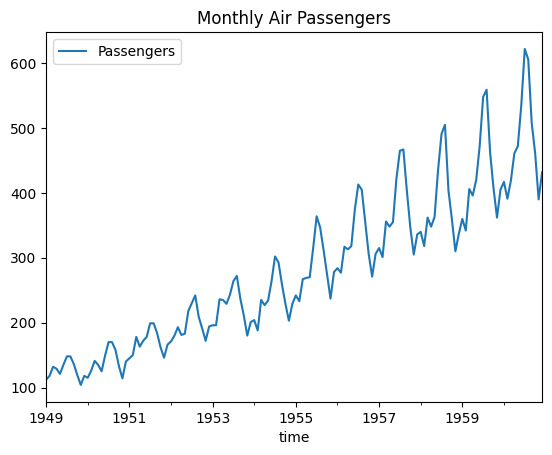

In [6]:
# Plot
data.plot(title="Monthly Air Passengers")


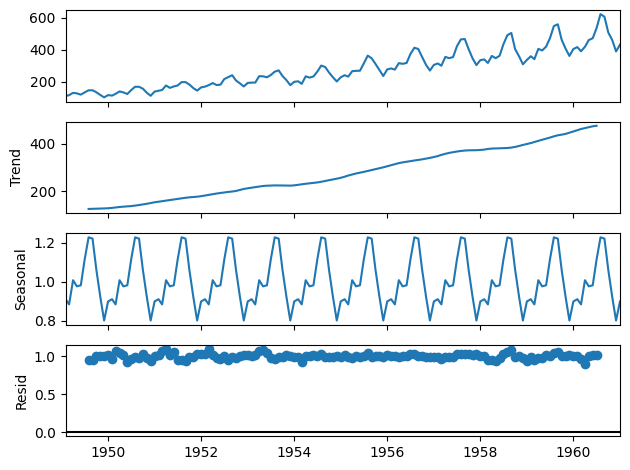

In [7]:
# Seasonal Decomposition
seasonal_decompose(data, model="multiplicative").plot()
plt.show()

In [8]:
# Train-Test Split
train = data[:'1958-12-01']
test = data['1959-01-01':]


In [9]:
# Holt-Winters model
hwmodel = ExponentialSmoothing(
    train["Passengers"],
    trend="add",
    seasonal="mul",
    seasonal_periods=12
).fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [10]:
# Forecast for test length
test_pred = hwmodel.forecast(len(test))


<Axes: xlabel='time'>

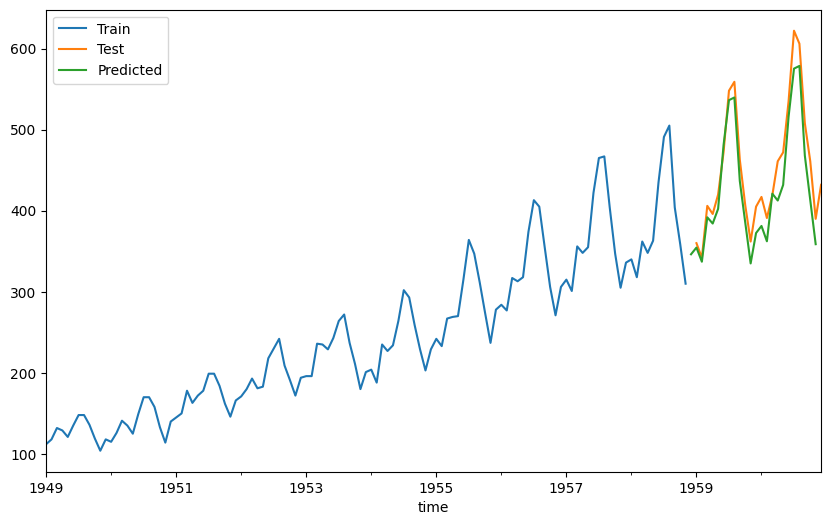

In [11]:

# Plot
train["Passengers"].plot(label="Train", legend=True, figsize=(10,6))
test["Passengers"].plot(label="Test", legend=True)
test_pred.plot(label="Predicted", legend=True)

In [12]:
# RMSE
rmse = np.sqrt(mean_squared_error(test, test_pred))
print("RMSE:", rmse)

RMSE: 55.03272309579559
